In [1]:
"""
In this program we will use Adult dataset as example of taking a complex reality and attempting to model it using features.
The aim is to estimate if someone earns more than $50,000 per year.
"""

# Loading the dataset
import os
import pandas as pd
data_folder = os.path.join(os.path.expanduser("~"), "OneDrive\Desktop\Pace\CS619\Chapter05\Data")
adult_filename = os.path.join(data_folder, "adult.data")
adult = pd.read_csv(adult_filename, header=None, names=["Age", "Work-Class", "fnlwgt", "Education", "Education-Num", 
                                                        "Marital-Status", "Ocupation", "Relationship", "Race", "Sex", 
                                                       "Capital-gain", "Capital-loss", "Hours-per-week", "Native-Country", 
                                                       "Earnings-Raw"])

In [2]:
# Removing blank lines or invalid numbers
adult.dropna(how='all', inplace=True)

In [3]:
# Having a look at the dataset
adult.columns

Index(['Age', 'Work-Class', 'fnlwgt', 'Education', 'Education-Num',
       'Marital-Status', 'Ocupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-Country',
       'Earnings-Raw'],
      dtype='object')

In [4]:
# Examining the dataset
adult.head()

,Age,Work-Class,fnlwgt,Education,Education-Num,Marital-Status,Ocupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-Country,Earnings-Raw
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Using describe function to get basic summary stats of the data
adult['Hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours-per-week, dtype: float64

In [6]:
# Creating an approximation of Education feature using Education-Num (number of years) by taking the mean value
adult['Education-Num'].median()

10.0

In [7]:
# Checking unique values of categorical feature Work-Class
adult['Work-Class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
# Checking frequency of each value of feature Work-Class
adult['Work-Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work-Class, dtype: int64

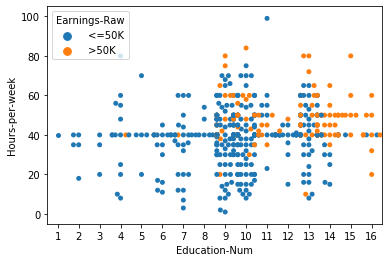

In [9]:
# Creating swarm plot to viasualise relation between education and hours-worked
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.swarmplot(x='Education-Num', y='Hours-per-week', hue='Earnings-Raw', data=adult[::50])    # Showing every 50 rows

In [10]:
# Creating another feature that tell if a person works more than 40 hours per week
# This turns the continuous feature Hours-per-week into a categorical one that is True or False depeding on number of hours
adult['LongHours'] = adult['Hours-per-week']>40
adult.head(10)

,Age,Work-Class,fnlwgt,Education,Education-Num,Marital-Status,Ocupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-Country,Earnings-Raw,LongHours
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,False
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,False
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,True
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,True
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,False


In [11]:
# Using VarianceThreshold transformer to remove any feature that doesn't have at least a minimum level of variance in the values
import numpy as np
X = np.arange(30).reshape((10,3))

# Checking dataset
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23],
       [24, 25, 26],
       [27, 28, 29]])

In [12]:
# Setting entire second column/feature to the value 1
X[:,1] = 1

# Checking changes
X

array([[ 0,  1,  2],
       [ 3,  1,  5],
       [ 6,  1,  8],
       [ 9,  1, 11],
       [12,  1, 14],
       [15,  1, 17],
       [18,  1, 20],
       [21,  1, 23],
       [24,  1, 26],
       [27,  1, 29]])

In [13]:
# Creating VariaceThreshold transformer and applying to the dataset created
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
Xt = vt.fit_transform(X)

# Checking dataset after transformation
Xt

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11],
       [12, 14],
       [15, 17],
       [18, 20],
       [21, 23],
       [24, 26],
       [27, 29]])

In [14]:
# Checking variances for each column
vt.variances_

array([27.,  0., 27.])

In [15]:
# Testing single-feature correlation with a class value using method chi-squared and transformer SelectKBest

# Getting selection of features
X = adult[['Age', 'Education-Num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']].values
X

array([[   39,    13,  2174,     0,    40],
       [   50,    13,     0,     0,    13],
       [   38,     9,     0,     0,    40],
       ...,
       [   58,     9,     0,     0,    40],
       [   22,     9,     0,     0,    20],
       [   52,     9, 15024,     0,    40]], dtype=int64)

In [16]:
# Creating a target class array by testing whether the Earnings-Raw value is above $50,000 or not
y = (adult['Earnings-Raw'] == ' >50K').values
y

array([False, False, False, ..., False, False,  True])

In [17]:
# Creating transformer using chi2 and selectKBest transformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
transformer = SelectKBest(score_func=chi2, k=3)

# Running fit_transform to create new dataset choosing only the best three features
Xt_chi2 = transformer.fit_transform(X, y)

In [18]:
print(transformer.scores_)

[8.60061182e+03 2.40142178e+03 8.21924671e+07 1.37214589e+06
 6.47640900e+03]


In [19]:
# Implementing other correlation such as Pearson correlation coefficient
from scipy.stats import pearsonr

In [20]:
# Defining a function that allow the use of multivariate arrays like the one we have
def multivariate_pearsonr(X, y):
    scores, pvalues = [], []
    for column in range(X.shape[1]):
        # Compute the Pearson correlation for this column only
        cur_score, cur_p = pearsonr(X[:,column], y)
        # Record both the score and p-value
        scores.append(abs(cur_score))
        pvalues.append(cur_p)
    return (np.array(scores), np.array(pvalues))

In [21]:
# Using the transformer class as before to rank the features using the Pearson correlation coefficient
transformer = SelectKBest(score_func=multivariate_pearsonr, k=3)
Xt_pearson = transformer.fit_transform(X, y)
print(transformer.scores_)

[0.2340371  0.33515395 0.22332882 0.15052631 0.22968907]


In [22]:
# Running features through classifier to see which one is better
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=14)
scores_chi2 = cross_val_score(clf, Xt_chi2, y, scoring='accuracy')
scores_pearson = cross_val_score(clf, Xt_pearson, y, scoring='accuracy')

print(f'Chi2 score: {scores_chi2.mean():.2f}')
print(f'Pearson score: {scores_pearson.mean():.2f}')

Chi2 score: 0.83
Pearson score: 0.77


In [23]:
# Implementing a Transformer by creating a class and two method for:
# Get the mean for each feature in the fit method
# Return which values are more than the mean for a given feature in the transform method
from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array

class MeanDiscrete(TransformerMixin):
    def fit(self, X, y=None):
        X = as_float_array(X)
        self.mean = X.mean(axis=0)
        return self
    
    def transform(self, X, y=None):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0]
        return X > self.mean

In [24]:
mean_discrete = MeanDiscrete()
X_mean = mean_discrete.fit_transform(X)

In [25]:
# Checking the mean of Xt variable
Xt.mean(0)

array([13.5, 15.5])

In [26]:
# Creating unit test to test if the transformer is working as it should be
from numpy.testing import assert_array_equal

def test_meandiscrete():
    X_test = np.array([[0, 2],
                      [3, 5],
                      [6, 8],
                      [9, 11],
                      [12, 14],
                      [15, 17],
                      [18, 20],
                      [21, 23],
                      [24, 26],
                      [27, 29]])
    # Create an instance of the Transformer
    mean_discrete = MeanDiscrete()
    mean_discrete.fit(X_test)
    # Check that the computed mean is correct
    assert_array_equal(mean_discrete.mean, np.array([13.5, 15.5]))    # Mean of the two features of Xt variable
    # Also test that transform works properly
    X_transformed = mean_discrete.transform(X_test)
    X_expected = np.array([[0, 0],
                          [0, 0],
                          [0, 0],
                          [0, 0],
                          [0, 0],
                          [1, 1],
                          [1, 1],
                          [1, 1],
                          [1, 1],
                          [1, 1]])
    assert_array_equal(X_transformed, X_expected)

    
# Testing the transformer
test_meandiscrete()

In [27]:
# Putting the transformer into action
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('mean_discrete', MeanDiscrete()), ('classifier', DecisionTreeClassifier(random_state=14))])
scores_mean_discrete = cross_val_score(pipeline, X, y, scoring='accuracy')
print(f'Mean Discrete performance: {scores_mean_discrete.mean():.3f}')

Mean Discrete performance: 0.803
